# Scattering Line Fit

In [9]:
import numpy as np
import pandas as pd
from ROOT import TCanvas, TGraphErrors, TF1, gStyle
from ROOT import gROOT
from array import array
import math as math


In [44]:
x=array('f',[0.1736,0.3420,0.5,0.6428,0.766,0.866,0.9397,0.9848,1])
ylist=[48,44,59,80,103,85,122,153,82]
y=array('f',list(ylist))


In [43]:
ndata =9
sy=[math.sqrt(i) for i in ylist]

weight = 0
ey=array('f',sy)
totw = 0 # Total weight
xybar = 0; xbar = 0; ybar = 0; x2bar = 0 # weighted averages
ex=array('f',[0,0,0,0,0,0,0,0,0])
sy

[6.928203230275509,
 6.6332495807108,
 7.681145747868608,
 8.94427190999916,
 10.14889156509222,
 9.219544457292887,
 11.045361017187261,
 12.36931687685298,
 9.055385138137417]

In [34]:
for i in range(ndata):
    weight = 1./(ey[i]*ey[i])
    totw += weight
    xybar += (x[i]*y[i]*weight)
    xbar += (x[i]*weight)
    ybar += (y[i]*weight)
    x2bar += (x[i]*x[i]*weight)

xybar /= totw
xbar /= totw
ybar /= totw
x2bar /= totw

In [35]:
sy2bar = ndata / totw # weighted average error squared
slope = (xybar - xbar*ybar) / (x2bar - xbar*xbar)
itcpt = ybar - slope * xbar
slopeerr = np.sqrt( sy2bar / (ndata * (x2bar - xbar*xbar) ) )
itcpterr = np.sqrt( x2bar ) * slopeerr

print("slope of fit line = {} +- {}".format(slope, slopeerr))
print("intercept of fit line = {} +- {}".format(itcpt, itcpterr))


slope of fit line = 84.9928419235 +- 9.7823915226
intercept of fit line = 23.8245359506 +- 6.46206736229


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


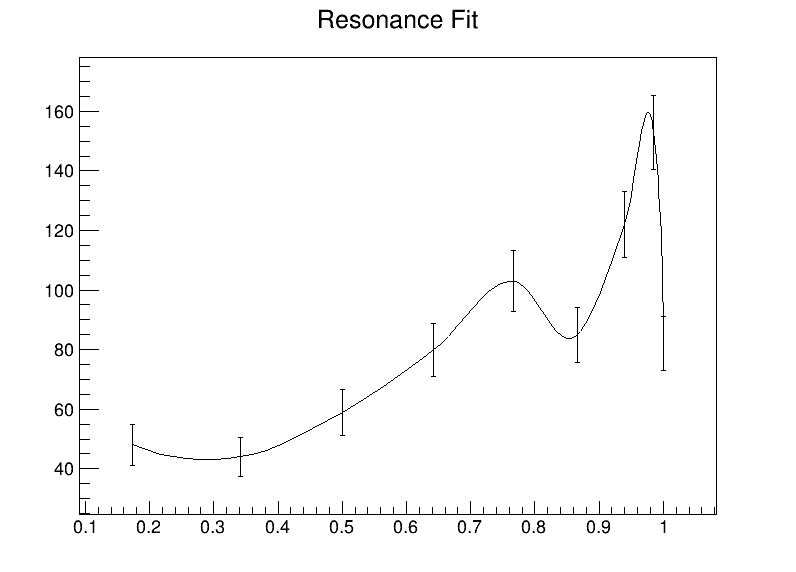

In [36]:
c1 = TCanvas( 'c1', 'A Simple Graph with error bars', 0, 0, 800, 600 )
mygraph = TGraphErrors(ndata,x,y,ex,ey)
mygraph.Draw("Ac")
mygraph.SetTitle("Resonance Fit")
c1.Draw()

 FCN=33.3572 FROM MIGRAD    STATUS=CONVERGED      29 CALLS          30 TOTAL
                     EDM=2.78146e-23    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.49928e+01   9.78239e+00   1.24344e-02   1.42859e-12
   2  p1           2.38245e+01   6.46207e+00   8.21390e-03   1.29757e-12


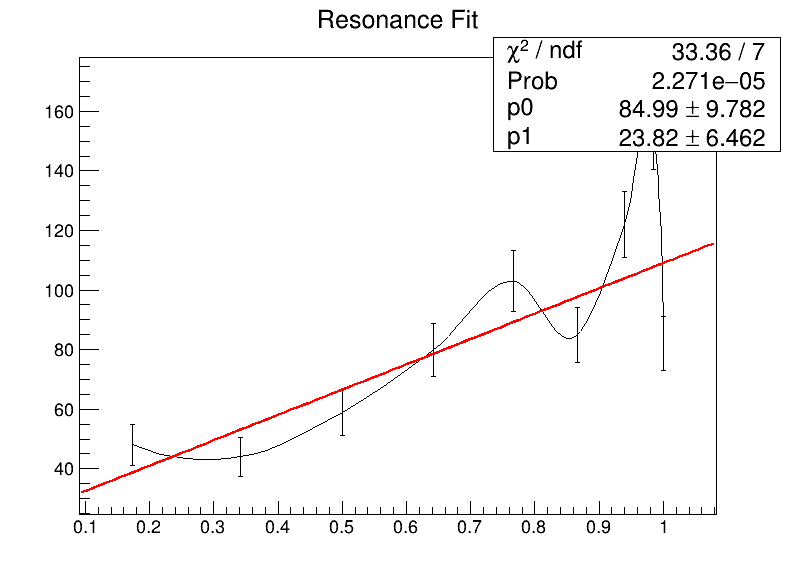

In [42]:
fnew = TF1("fnew","[0]*x+[1]",0,2500)
fnew.SetRange(0,1.5)
fnew.SetParameters(10,10)
mygraph.Fit(fnew,"0")
gStyle.SetOptFit(11111)
fnew.Draw("same")
c1.Draw()

In [91]:
fnew.Mean